In [1]:
# KMEANS CLUSTERING->
#UNSUPERVUSED LEARNING->class value(not given on the basis of grouping),label,y-value
#(cluster->grouping on shape,size,color basis)
# KMEANS CLUSTERING->
#->groups
#->cluster

#k=2
#GROUP1->Male
#GROUP2->Female
#color1->white
#color2->BLACK
#GPA-> >=3
#GPA-> <=3
#Distance formulas->
#Manhattan Distance
#Euclidean Distance-> √(xi-c)6^2 where x is feature and c is cluster centried point
#Minkowaski Distance
#random centreified points 23,37 
# x(Age) |c1       | c2     |
#    16  |16-23=7  |16-37=21|
#    17  |6        |20      |
#    21  |2        |16      |
#    24  |1        |3      |
#    31  |8        |6      |
#    37  |14        |0      |
#    35  |12        |2      |
#    15  |8        |22      |
#    18  |5        |19     |
#    21  |2        |18      |
#    22  |1        |15      |
#    33  |10        |14      |

In [2]:
#needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('kmeans.csv',header=None)

In [4]:
data

,0,1
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,6.0,5.1
6,5.4,4.5
7,6.0,4.5
8,6.7,4.7
9,6.3,4.4


In [5]:
headers=["Petal_Length","Sepal_Length"]
data.columns=headers

In [6]:
data

,Petal_Length,Sepal_Length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,6.0,5.1
6,5.4,4.5
7,6.0,4.5
8,6.7,4.7
9,6.3,4.4


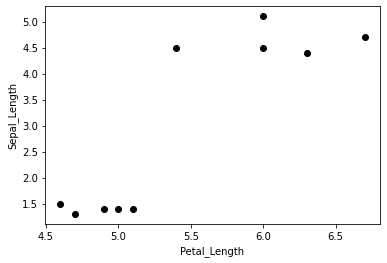

In [7]:
x = data[["Petal_Length","Sepal_Length"]]
# Visualise data points
plt.scatter(x["Petal_Length"],x["Sepal_Length"],c='black')
plt.xlabel('Petal_Length')
plt.ylabel('Sepal_Length')
plt.show()

In [8]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster
#number of clusters
import random as rd #random library being used to get random values for our cenntroids
K=2
Centroids=(x.sample(n=K))
Centroids

,Petal_Length,Sepal_Length
4,5.0,1.4
5,6.0,5.1


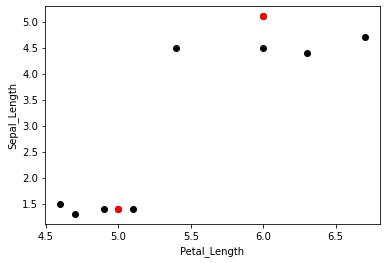

In [9]:
plt.scatter(x["Petal_Length"],x["Sepal_Length"],c='black')
plt.scatter(Centroids["Petal_Length"],Centroids["Sepal_Length"],c="red")
plt.xlabel('Petal_Length')
plt.ylabel('Sepal_Length')
plt.show()

In [10]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4
from math import sqrt
y=1
j=0
while(y!=0):#to refine data until to its proper clearance
    XD=x
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Petal_Length"]-row_d["Sepal_Length"])**2
            d2=(row_c["Sepal_Length"]-row_d["Sepal_Length"])**2
            d=sqrt(d1+d2)
            ED.append(d)
        x[i]=ED
        i=i+1
    C=[]
    for index,row in x.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1]<min_dist:
                min_dist=row[i+1]
                pos=i+1
        C.append(pos)
    x["Clust"]=C
    Centroids_new=x.groupby(["Clust"]).mean()[["Sepal_Length","Petal_Length"]]
    if j== 0:
        y= 1
        j=j+1
    else:
        y=(Centroids_new['Sepal_Length']-Centroids['Sepal_Length']).sum()+(Centroids_new['Petal_Length']-Centroids['Petal_Length']).sum()
        print(y.sum())
    Centroids=x.groupby(["Clust"]).mean()[["Sepal_Length","Petal_Length"]]

0.0


In [11]:
Centroids

,Sepal_Length,Petal_Length
Clust,,
1,1.40,4.86
2,4.64,6.08


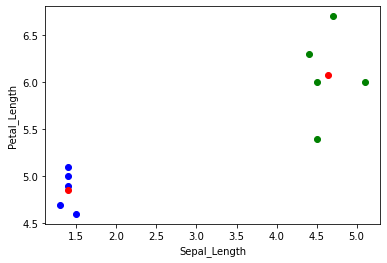

In [12]:
color=['blue','green']
for k in range(K):
    data=x[x["Clust"]==k+1]
    plt.scatter(data["Sepal_Length"],data["Petal_Length"],c=color[k])
plt.scatter(Centroids["Sepal_Length"],Centroids["Petal_Length"],c='red')
plt.xlabel("Sepal_Length")
plt.ylabel("Petal_Length")
plt.show()